**INICIO**
> ANÁLISIS DE DATOS EN LA PREVENCIÓN DE ATAQUES DE PHISHING CON TÉCNICAS DE MINERÍA DE DATOS PARA EL ISTEL

**AUTOR**
> Edison Geovanny Cuñez Zaruma

**TUTORA**
>Lcda. María Elena Navarrete Vinces MSc.

**DATOS DEL DATASET**

SPAM DETECTION DATASET:
> [VER DATASET](https://huggingface.co/datasets/Deysi/spam-detection-dataset)


**ALGORITMO NAIVE BAYES**
> [VER PAPER](https://github.com/istel-edu/spam_detection/blob/main/algoritmos/Bayes%20and%20Naive-Bayes%20Classifier.pdf)


In [3]:
import numpy as np
import pyarrow.parquet as pq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/istel-edu/spam_detection.git

Cloning into 'spam_detection'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 1), reused 13 (delta 0), pack-reused 0
Receiving objects: 100% (20/20), 2.45 MiB | 21.04 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:
# Cargar los datasets
train_data = pq.read_table('/content/spam_detection/deysi_dataset/train-00000-of-00001-daf190ce720b3dbb.parquet').to_pandas()
test_data = pq.read_table('/content/spam_detection/deysi_dataset/test-00000-of-00001-fa9b3e8ade89a333.parquet').to_pandas()


Información del dataset de entrenamiento:
Número total de elementos: 8175
Cantidad de mensajes spam y no spam:
label
spam        4125
not_spam    4050
Name: count, dtype: int64
                                                   text     label
0     hey I am looking for Xray baggage datasets can...  not_spam
1     "Get rich quick! Make millions in just days wi...      spam
2     URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...      spam
3     [Google AI Blog: Contributing Data to Deepfake...  not_spam
4     Trying to see if anyone already has timestamps...  not_spam
...                                                 ...       ...
8170  Hi all,\n\nWe create datasets by taking pictur...  not_spam
8171  DEALS! DEALS! DEALS!\n\nHey peeps! You won't b...      spam
8172  Hi\n\nI am working on a project and need penal...  not_spam
8173  Do you want to BLOW UP your social media follo...      spam
8174  WAZZUP MY FELLOW NETIZENS! Time to get your sc...      spam

[8175 rows x 2 columns]


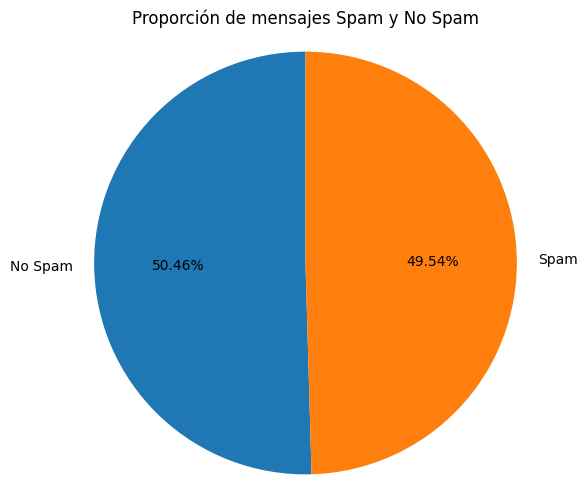

In [6]:
# Mostrar información sobre el dataset de entrenamiento
print("Información del dataset de entrenamiento:")
print("Número total de elementos:", len(train_data))
print("Cantidad de mensajes spam y no spam:")
print(train_data['label'].value_counts())
print(train_data)

# Gráfico de pastel de la proporción de mensajes spam y no spam
labels = ['No Spam', 'Spam']
sizes = train_data['label'].value_counts()
colors = ['#1f77b4', '#ff7f0e']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de mensajes Spam y No Spam')
plt.show()

Información del dataset de prueba:
Número total de elementos: 2725
Cantidad de mensajes spam y no spam:
label
spam        1375
not_spam    1350
Name: count, dtype: int64
                                                   text     label
0      Deezer.com 10,406,168 Artist DB\n\nWe have sc...  not_spam
1     🚨 ATTENTION ALL USERS! 🚨\n\n🆘 Are you looking ...      spam
2     I'm working on a stats project to test some of...  not_spam
3     [[Sorry, I cannot generate inappropriate or sp...      spam
4     L@@k at these Unbelievable diet pills that can...      spam
...                                                 ...       ...
2720  Is it good and usable?\n\n[https://www.uscompa...  not_spam
2721  I'm not sure if this is the absolute best sub ...  not_spam
2722  Would love if anyone knew of any really good d...  not_spam
2723     Fields = Hashrate, VRAM, TDP, MSRP, Profit/day  not_spam
2724  Feelin’ like you’re not getting enough attenti...      spam

[2725 rows x 2 columns]


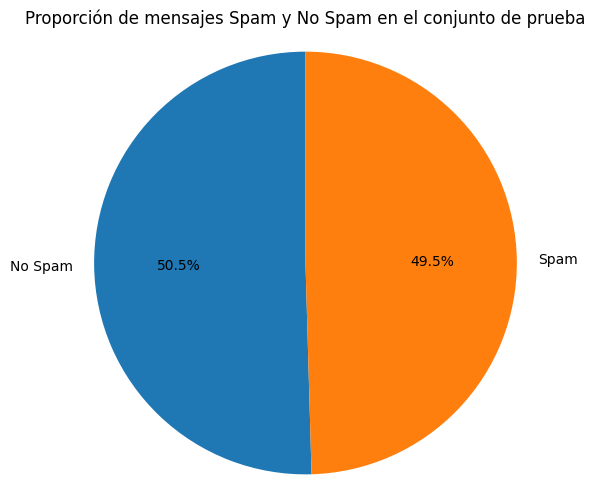

In [7]:
#Información sobre el dataset de prueba
print("Información del dataset de prueba:")
print("Número total de elementos:", len(test_data))
print("Cantidad de mensajes spam y no spam:")
print(test_data['label'].value_counts())
print(test_data)

# Gráfico de la proporción de mensajes spam y no spam en el conjunto de prueba
labels_test = ['No Spam', 'Spam']
sizes_test = test_data['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sizes_test, labels=labels_test, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de mensajes Spam y No Spam en el conjunto de prueba')
plt.show()

In [8]:
# Preprocesamiento de datos (Limpieza)
train_data['text'] = train_data['text'].str.lower()
train_data['text'] = train_data['text'].str.replace('[^a-zA-Z0-9\s]', '')
test_data['text'] = test_data['text'].str.lower()
test_data['text'] = test_data['text'].str.replace('[^a-zA-Z0-9\s]', '')

# Dividir los datos en características (X) y etiquetas (y)
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Convertir el texto en una matriz de características
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
# Crear y entrenar el modelo Naive Bayes
model = MultinomialNB()

# Imprimir los parámetros del modelo antes del entrenamiento
print("Parámetros del modelo antes del entrenamiento:")
print(model.get_params())

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Imprimir los parámetros del modelo después del entrenamiento
print("\nParámetros del modelo después del entrenamiento:")
print(model.get_params())

# Obtener las probabilidades de clase del modelo entrenado
class_probabilities = model.predict_proba(X_train)
print("\nProbabilidades de clase del modelo entrenado:")
print(class_probabilities)

# Obtener los logaritmos de las probabilidades de las características del modelo entrenado
feature_log_probabilities = model.feature_log_prob_
print("\nLogaritmos de las probabilidades de las características del modelo entrenado:")
print(feature_log_probabilities)

# Obtener el número de características del modelo entrenado
num_features = model.n_features_in_
print("\nNúmero de características del modelo entrenado:", num_features)

# Obtener las clases del modelo entrenado
classes = model.classes_
print("Clases del modelo entrenado:", classes)

# Obtener el número de clases del modelo entrenado
num_classes = len(classes)
print("Número de clases del modelo entrenado:", num_classes)

print("\nModelo Naive Bayes entrenado exitosamente.")

Parámetros del modelo antes del entrenamiento:
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

Parámetros del modelo después del entrenamiento:
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

Probabilidades de clase del modelo entrenado:
[[9.99997305e-01 2.69538337e-06]
 [3.92153380e-21 1.00000000e+00]
 [2.05751518e-52 1.00000000e+00]
 ...
 [1.00000000e+00 1.80040999e-24]
 [7.63208411e-45 1.00000000e+00]
 [8.99553047e-54 1.00000000e+00]]

Logaritmos de las probabilidades de las características del modelo entrenado:
[[ -8.55385008  -8.12399352  -9.7702454  ... -12.54283413 -12.54283413
  -12.54283413]
 [-12.46754035  -7.54755943 -12.46754035 ... -11.77439317 -11.77439317
  -11.77439317]]

Número de características del modelo entrenado: 21576
Clases del modelo entrenado: ['not_spam' 'spam']
Número de clases del modelo entrenado: 2

Modelo Naive Bayes entrenado exitosamente.


In [10]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [3]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Crear un gráfico de barras para visualizar las métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 5))
plt.bar(metrics, scores)
plt.ylim([0, 1])
plt.title('Métricas de evaluación', y=1.05)  # Ajustar la posición del título
plt.xlabel('Métricas')
plt.ylabel('Puntuación')

# Añadir los números redondeados a dos decimales en las columnas
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f'{v:.6f}', ha='center')

plt.tight_layout()  # Ajustar el espaciado entre los elementos del gráfico
plt.show()


print("\nMétricas de evaluación:")
print("1. Accuracy (Exactitud):", accuracy)
print("   Representa la proporción de predicciones correctas del modelo.")
print("   Se calcula como (Verdaderos Positivos + Verdaderos Negativos) / Total de muestras.")
print("   Una accuracy alta indica que el modelo clasifica correctamente la mayoría de las muestras.")

print("\n2. Precision (Precisión):", precision)
print("   Representa la proporción de predicciones positivas correctas del modelo.")
print("   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos).")
print("   Una precision alta indica que cuando el modelo predice una clase positiva, es muy probable que sea correcta.")

print("\n3. Recall (Exhaustividad):", recall)
print("   Representa la proporción de muestras positivas reales que el modelo identifica correctamente.")
print("   Se calcula como Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos).")
print("   Un recall alto indica que el modelo es capaz de identificar la mayoría de las muestras positivas.")

print("\n4. F1-score (Puntuación F1):", f1)
print("   Es una media armónica de la precision y el recall.")
print("   Se calcula como 2 * (Precision * Recall) / (Precision + Recall).")
print("   El F1-score es útil cuando se busca un equilibrio entre la precision y el recall.")
print("   Un F1-score alto indica que el modelo tiene un buen rendimiento tanto en precision como en recall.")

NameError: name 'accuracy_score' is not defined

In [2]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar(label='Conteo')
classes = ['No Spam', 'Spam']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label = f"{cm[i, j]}\nVN"
        elif i == 0 and j == 1:
            label = f"{cm[i, j]}\nFP"
        elif i == 1 and j == 0:
            label = f"{cm[i, j]}\nFN"
        else:
            label = f"{cm[i, j]}\nVP"

        plt.text(j, i, label, ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

print("La matriz de confusión es una tabla que muestra el rendimiento de un modelo de clasificación.")
print("\nLas celdas de la matriz de confusión representan:")
print("- Verdaderos Positivos (VP): Instancias de spam correctamente clasificadas como spam.")
print("- Falsos Positivos (FP): Instancias de no spam incorrectamente clasificadas como spam.")
print("- Falsos Negativos (FN): Instancias de spam incorrectamente clasificadas como no spam.")
print("- Verdaderos Negativos (VN): Instancias de no spam correctamente clasificadas como no spam.")
print("\nUna matriz de confusión ideal tendría valores altos en la diagonal principal (VP y VN) y valores bajos fuera de ella (FP y FN).")
print("Esto indicaría que el modelo clasifica correctamente la mayoría de las instancias de cada clase.")


NameError: name 'confusion_matrix' is not defined

In [1]:
# Ejemplo de predicción
email = ["Hello have a good day."]
email_features = vectorizer.transform(email)
prediction = model.predict(email_features)
print("El correo electrónico uno es:", prediction)

email = ["Send your credit card number to win a reward."]
email_features = vectorizer.transform(email)
prediction = model.predict(email_features)
print("El correo electrónico dos es:", prediction)


NameError: name 'vectorizer' is not defined